In [1]:
!pip install geopandas

In [2]:
# import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
# import contextily as ctx
# import requests
# import tempfile
# import zipfile



In [3]:
%store -r donnees_2018_hab
donnees_2018_hab

,REG,Libellé,MED18,TP6018,D118,D918,RD18,T1_2018,Nb_PN_GN_dep_100k_hab,Crim_Del_PN_GN,Nb_Boucherie_dep_hab,Crim_Del_GN_hab,Crim_Del_PN_hab,Crim_Del_PN_GN_hab
01,Auvergne-Rhône-Alpes,AIN,23420,10.3,12900,44080,3.4,6.4,20.0,26087.0,32.0,3045.0,885.0,3930.0
02,Hauts-de-France,AISNE,19690,18.4,10730,33170,3.1,13.0,30.0,25842.0,22.0,2511.0,2227.0,4739.0
03,Auvergne-Rhône-Alpes,ALLIER,20360,15.5,11360,33600,3.0,9.7,41.0,13416.0,30.0,1578.0,2298.0,3876.0
04,Provence-Alpes-Côte d'Azur,ALPES-DE-HAUTE-PROVENCE,20580,16.8,11060,35380,3.2,11.0,39.0,8367.0,47.0,3326.0,1636.0,4962.0
05,Provence-Alpes-Côte d'Azur,HAUTES-ALPES,20880,13.9,11800,35410,3.0,8.6,45.0,6591.0,48.0,2527.0,2009.0,4536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Île-de-France,ESSONNE,23920,13.1,11880,42180,3.6,7.3,30.0,69610.0,23.0,1184.0,4125.0,5310.0
92,Île-de-France,HAUTS-DE-SEINE,28040,11.9,12220,60580,5.0,7.0,44.0,110533.0,23.0,NaN,6758.0,6758.0
93,Île-de-France,SEINE-SAINT-DENIS,17740,28.4,8910,33960,3.8,12.0,34.0,141638.0,36.0,NaN,8640.0,8640.0
94,Île-de-France,VAL-DE-MARNE,22880,16.6,10790,44900,4.2,8.3,38.0,89604.0,26.0,NaN,6374.0,6374.0


In [4]:
url_dep = 'https://www.data.gouv.fr/fr/datasets/r/90b9341a-e1f7-4d75-a73c-bbc010c7feeb'
departements = gpd.read_file(url_dep)
departements = departements.set_index("code")
departements.drop(['nom'], axis=1, inplace = True)
departements


,geometry
code,
01,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
02,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ..."
03,"POLYGON ((3.03207 46.79491, 3.03424 46.79080, ..."
04,"POLYGON ((5.67604 44.19143, 5.67817 44.19051, ..."
05,"POLYGON ((6.26057 45.12685, 6.26417 45.12641, ..."
...,...
91,"POLYGON ((2.22656 48.77610, 2.22866 48.77451, ..."
92,"POLYGON ((2.29097 48.95097, 2.29162 48.95077, ..."
93,"POLYGON ((2.55306 49.00982, 2.55814 49.01201, ..."


In [31]:
#Restriction au champ IDF pour une sous-carte
departements_idf = departements.loc[departements.index.isin(['75','77','78','91','92','93','94','95'])]
departements_idf

,geometry
code,
75,"POLYGON ((2.33190 48.81701, 2.33247 48.81825, ..."
77,"POLYGON ((2.57166 48.69201, 2.57166 48.69345, ..."
78,"POLYGON ((1.60880 49.07789, 1.61075 49.07548, ..."
91,"POLYGON ((2.22656 48.77610, 2.22866 48.77451, ..."
92,"POLYGON ((2.29097 48.95097, 2.29162 48.95077, ..."
93,"POLYGON ((2.55306 49.00982, 2.55814 49.01201, ..."
94,"POLYGON ((2.33190 48.81701, 2.33371 48.81677, ..."
95,"POLYGON ((2.59052 49.07965, 2.59013 49.07786, ..."


In [52]:
donnees_2018_hab.index.names = ['CODDEP']
donnees_2018_hab.describe()

,MED18,TP6018,D118,D918,RD18,T1_2018,Nb_PN_GN_dep_100k_hab,Crim_Del_PN_GN,Nb_Boucherie_dep_hab,Crim_Del_GN_hab,Crim_Del_PN_hab,Crim_Del_PN_GN_hab
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,91.000000,96.000000,96.000000
mean,21395.416667,14.529167,11669.270833,37039.895833,3.184375,8.876042,32.229167,36897.218750,31.989583,2116.153846,2556.864583,4562.770833
std,1672.541663,3.097874,806.946479,5604.855882,0.503948,1.745716,12.623686,43016.729897,10.149923,599.764878,1834.623275,1419.925509
min,17740.000000,8.900000,8910.000000,31910.000000,2.500000,5.400000,16.000000,2132.000000,15.000000,674.000000,681.000000,2657.000000
25%,20415.000000,12.375000,11205.000000,33875.000000,2.900000,7.675000,25.000000,11681.000000,26.000000,1706.500000,1490.500000,3750.500000
50%,21010.000000,14.400000,11635.000000,35395.000000,3.050000,8.700000,30.000000,23232.500000,31.000000,2218.000000,2072.500000,4270.500000
75%,21907.500000,15.725000,12230.000000,38220.000000,3.325000,9.800000,36.250000,38877.750000,36.250000,2531.500000,2777.500000,4921.500000
max,28270.000000,28.400000,13580.000000,68990.000000,6.400000,14.300000,117.000000,286174.000000,67.000000,3620.000000,13052.000000,13052.000000


In [53]:
donnees_2018_hab_pauvrete = donnees_2018_hab.drop(['REG','MED18','D118','D918','RD18','T1_2018','Nb_PN_GN_dep_100k_hab','Crim_Del_PN_GN','Nb_Boucherie_dep_hab','Crim_Del_GN_hab','Crim_Del_PN_hab','Crim_Del_PN_GN_hab'], axis=1)
donnees_2018_hab_pauvrete

,Libellé,TP6018
CODDEP,,
01,AIN,10.3
02,AISNE,18.4
03,ALLIER,15.5
04,ALPES-DE-HAUTE-PROVENCE,16.8
05,HAUTES-ALPES,13.9
...,...,...
91,ESSONNE,13.1
92,HAUTS-DE-SEINE,11.9
93,SEINE-SAINT-DENIS,28.4


In [54]:
donnees_2018_hab_rev_median = donnees_2018_hab.drop(['REG','TP6018','D118','D918','RD18','T1_2018','Nb_PN_GN_dep_100k_hab','Crim_Del_PN_GN','Nb_Boucherie_dep_hab','Crim_Del_GN_hab','Crim_Del_PN_hab','Crim_Del_PN_GN_hab'], axis=1)
donnees_2018_hab_rev_median

,Libellé,MED18
CODDEP,,
01,AIN,23420
02,AISNE,19690
03,ALLIER,20360
04,ALPES-DE-HAUTE-PROVENCE,20580
05,HAUTES-ALPES,20880
...,...,...
91,ESSONNE,23920
92,HAUTS-DE-SEINE,28040
93,SEINE-SAINT-DENIS,17740


In [62]:
donnees_2018_hab_ratio_d1_d9 = donnees_2018_hab.drop(['REG','TP6018','D118','D918','MED18','T1_2018','Nb_PN_GN_dep_100k_hab','Crim_Del_PN_GN','Nb_Boucherie_dep_hab','Crim_Del_GN_hab','Crim_Del_PN_hab','Crim_Del_PN_GN_hab'], axis=1)
donnees_2018_hab_ratio_d1_d9

,Libellé,RD18
CODDEP,,
01,AIN,3.4
02,AISNE,3.1
03,ALLIER,3.0
04,ALPES-DE-HAUTE-PROVENCE,3.2
05,HAUTES-ALPES,3.0
...,...,...
91,ESSONNE,3.6
92,HAUTS-DE-SEINE,5.0
93,SEINE-SAINT-DENIS,3.8


In [8]:
carto_pauvrete=departements.merge(donnees_2018_hab_pauvrete,left_index=True,right_index=True)
carto_pauvrete

,geometry,Libellé,TP6018
01,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",AIN,10.3
02,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ...",AISNE,18.4
03,"POLYGON ((3.03207 46.79491, 3.03424 46.79080, ...",ALLIER,15.5
04,"POLYGON ((5.67604 44.19143, 5.67817 44.19051, ...",ALPES-DE-HAUTE-PROVENCE,16.8
05,"POLYGON ((6.26057 45.12685, 6.26417 45.12641, ...",HAUTES-ALPES,13.9
...,...,...,...
91,"POLYGON ((2.22656 48.77610, 2.22866 48.77451, ...",ESSONNE,13.1
92,"POLYGON ((2.29097 48.95097, 2.29162 48.95077, ...",HAUTS-DE-SEINE,11.9
93,"POLYGON ((2.55306 49.00982, 2.55814 49.01201, ...",SEINE-SAINT-DENIS,28.4
94,"POLYGON ((2.33190 48.81701, 2.33371 48.81677, ...",VAL-DE-MARNE,16.6


In [55]:
carto_rev_median=departements.merge(donnees_2018_hab_rev_median,left_index=True,right_index=True)
carto_rev_median

,geometry,Libellé,MED18
01,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",AIN,23420
02,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ...",AISNE,19690
03,"POLYGON ((3.03207 46.79491, 3.03424 46.79080, ...",ALLIER,20360
04,"POLYGON ((5.67604 44.19143, 5.67817 44.19051, ...",ALPES-DE-HAUTE-PROVENCE,20580
05,"POLYGON ((6.26057 45.12685, 6.26417 45.12641, ...",HAUTES-ALPES,20880
...,...,...,...
91,"POLYGON ((2.22656 48.77610, 2.22866 48.77451, ...",ESSONNE,23920
92,"POLYGON ((2.29097 48.95097, 2.29162 48.95077, ...",HAUTS-DE-SEINE,28040
93,"POLYGON ((2.55306 49.00982, 2.55814 49.01201, ...",SEINE-SAINT-DENIS,17740
94,"POLYGON ((2.33190 48.81701, 2.33371 48.81677, ...",VAL-DE-MARNE,22880


In [63]:
carto_ratio_d1_d9=departements.merge(donnees_2018_hab_ratio_d1_d9,left_index=True,right_index=True)
carto_ratio_d1_d9

,geometry,Libellé,RD18
01,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",AIN,3.4
02,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ...",AISNE,3.1
03,"POLYGON ((3.03207 46.79491, 3.03424 46.79080, ...",ALLIER,3.0
04,"POLYGON ((5.67604 44.19143, 5.67817 44.19051, ...",ALPES-DE-HAUTE-PROVENCE,3.2
05,"POLYGON ((6.26057 45.12685, 6.26417 45.12641, ...",HAUTES-ALPES,3.0
...,...,...,...
91,"POLYGON ((2.22656 48.77610, 2.22866 48.77451, ...",ESSONNE,3.6
92,"POLYGON ((2.29097 48.95097, 2.29162 48.95077, ...",HAUTS-DE-SEINE,5.0
93,"POLYGON ((2.55306 49.00982, 2.55814 49.01201, ...",SEINE-SAINT-DENIS,3.8
94,"POLYGON ((2.33190 48.81701, 2.33371 48.81677, ...",VAL-DE-MARNE,4.2


In [28]:
#Restriction au champ IDF pour une sous-carte
carto_pauvrete_idf = carto_pauvrete.loc[carto_pauvrete.index.isin(['75','77','78','91','92','93','94','95'])]
carto_pauvrete_idf

,geometry,Libellé,TP6018
75,"POLYGON ((2.33190 48.81701, 2.33247 48.81825, ...",PARIS,15.2
77,"POLYGON ((2.57166 48.69201, 2.57166 48.69345, ...",SEINE-ET-MARNE,11.8
78,"POLYGON ((1.60880 49.07789, 1.61075 49.07548, ...",YVELINES,9.7
91,"POLYGON ((2.22656 48.77610, 2.22866 48.77451, ...",ESSONNE,13.1
92,"POLYGON ((2.29097 48.95097, 2.29162 48.95077, ...",HAUTS-DE-SEINE,11.9
93,"POLYGON ((2.55306 49.00982, 2.55814 49.01201, ...",SEINE-SAINT-DENIS,28.4
94,"POLYGON ((2.33190 48.81701, 2.33371 48.81677, ...",VAL-DE-MARNE,16.6
95,"POLYGON ((2.59052 49.07965, 2.59013 49.07786, ...",VAL-D'OISE,17.2


In [56]:
carto_rev_median_idf = carto_rev_median.loc[carto_rev_median.index.isin(['75','77','78','91','92','93','94','95'])]
carto_rev_median_idf

,geometry,Libellé,MED18
75,"POLYGON ((2.33190 48.81701, 2.33247 48.81825, ...",PARIS,28270
77,"POLYGON ((2.57166 48.69201, 2.57166 48.69345, ...",SEINE-ET-MARNE,23470
78,"POLYGON ((1.60880 49.07789, 1.61075 49.07548, ...",YVELINES,26810
91,"POLYGON ((2.22656 48.77610, 2.22866 48.77451, ...",ESSONNE,23920
92,"POLYGON ((2.29097 48.95097, 2.29162 48.95077, ...",HAUTS-DE-SEINE,28040
93,"POLYGON ((2.55306 49.00982, 2.55814 49.01201, ...",SEINE-SAINT-DENIS,17740
94,"POLYGON ((2.33190 48.81701, 2.33371 48.81677, ...",VAL-DE-MARNE,22880
95,"POLYGON ((2.59052 49.07965, 2.59013 49.07786, ...",VAL-D'OISE,21970


In [64]:
carto_ratio_d1_d9_idf = carto_ratio_d1_d9.loc[carto_ratio_d1_d9.index.isin(['75','77','78','91','92','93','94','95'])]
carto_ratio_d1_d9_idf

,geometry,Libellé,RD18
75,"POLYGON ((2.33190 48.81701, 2.33247 48.81825, ...",PARIS,6.4
77,"POLYGON ((2.57166 48.69201, 2.57166 48.69345, ...",SEINE-ET-MARNE,3.2
78,"POLYGON ((1.60880 49.07789, 1.61075 49.07548, ...",YVELINES,3.9
91,"POLYGON ((2.22656 48.77610, 2.22866 48.77451, ...",ESSONNE,3.6
92,"POLYGON ((2.29097 48.95097, 2.29162 48.95077, ...",HAUTS-DE-SEINE,5.0
93,"POLYGON ((2.55306 49.00982, 2.55814 49.01201, ...",SEINE-SAINT-DENIS,3.8
94,"POLYGON ((2.33190 48.81701, 2.33371 48.81677, ...",VAL-DE-MARNE,4.2
95,"POLYGON ((2.59052 49.07965, 2.59013 49.07786, ...",VAL-D'OISE,3.7


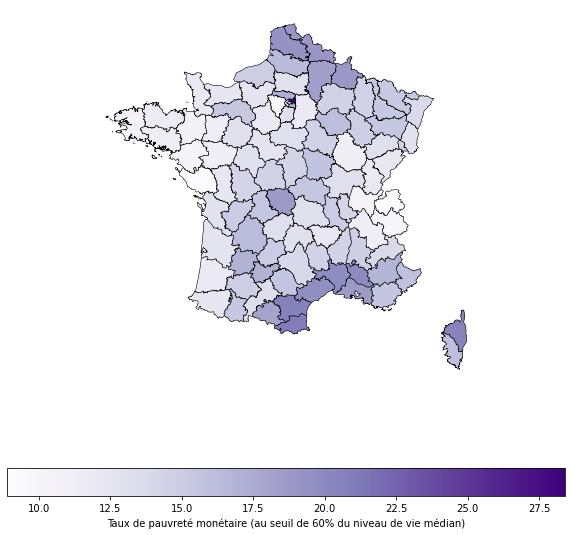

In [49]:

fig, ax = plt.subplots(figsize=(10,10))

departements.plot(color='gray', ax=ax)
carto_pauvrete.plot(column='TP6018', 
                    cmap='Purples', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Taux de pauvreté monétaire (au seuil de 60% du niveau de vie médian)', 'orientation': "horizontal"})
ax.set_axis_off()

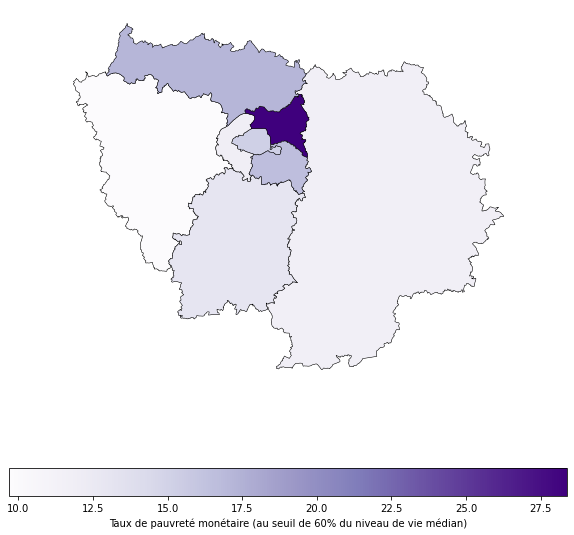

In [51]:

fig, ax = plt.subplots(figsize=(10,10))

departements_idf.plot(color='gray', ax=ax)
carto_pauvrete_idf.plot(column='TP6018', 
                    cmap='Purples', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Taux de pauvreté monétaire (au seuil de 60% du niveau de vie médian)', 'orientation': "horizontal"})
ax.set_axis_off()

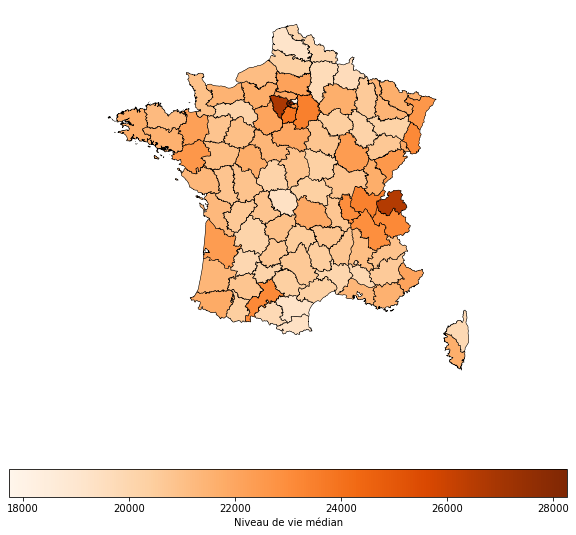

In [60]:
fig, ax = plt.subplots(figsize=(10,10))

departements.plot(color='gray', ax=ax)
carto_rev_median.plot(column='MED18', 
                    cmap='Oranges', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Niveau de vie médian', 'orientation': "horizontal"})
ax.set_axis_off()

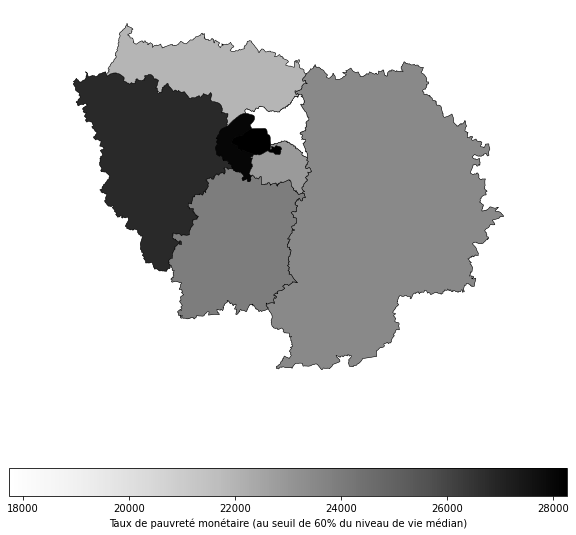

In [59]:
fig, ax = plt.subplots(figsize=(10,10))

departements_idf.plot(color='gray', ax=ax)
carto_rev_median_idf.plot(column='MED18', 
                    cmap='Oranges', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Taux de pauvreté monétaire (au seuil de 60% du niveau de vie médian)', 'orientation': "horizontal"})
ax.set_axis_off()

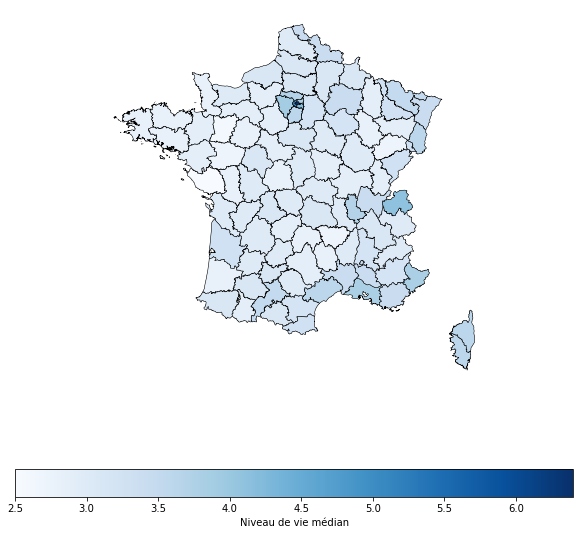

In [68]:
fig, ax = plt.subplots(figsize=(10,10))

departements.plot(color='gray', ax=ax)
carto_ratio_d1_d9.plot(column='RD18', 
                    cmap='Blues', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Niveau de vie médian', 'orientation': "horizontal"})
ax.set_axis_off()

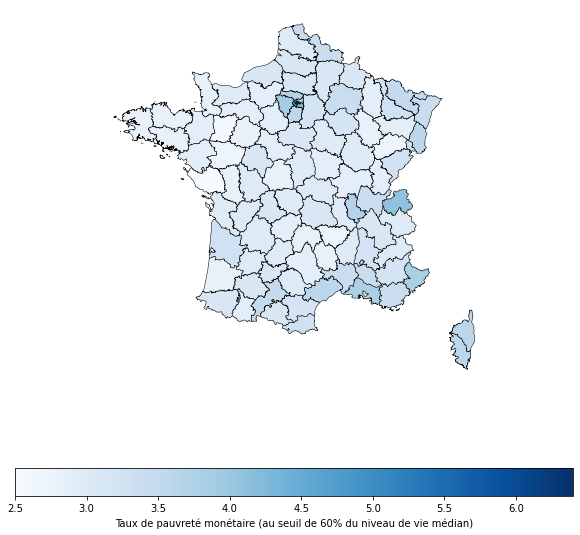

In [67]:
fig, ax = plt.subplots(figsize=(10,10))

departements_idf.plot(color='gray', ax=ax)
carto_ratio_d1_d9.plot(column='RD18', 
                    cmap='Rds', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Taux de pauvreté monétaire (au seuil de 60% du niveau de vie médian)', 'orientation': "horizontal"})
ax.set_axis_off()